# Imports

In [25]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [27]:
df = pd.read_csv('liked_tracks.csv')
df

,Track ID,Track Name,Artist,Album,Genre,Date Added,Popularity,Duration,Album Release Date,Tempo,Energy,Danceability,Year Added,Month Added,Day Added,Hour Added,Broad Genre
0,5rAxhWcgFng3s570sGO2F8,A Place for My Head,Linkin Park,Hybrid Theory (Bonus Edition),alternative metal,2024-06-12 12:45:21-05:00,65,3.077333,2000,133.063,0.908,0.603,2024,6,12,12,Metal
1,0rNqDh9zWWJVTLS4VfceHP,Brickell,Feid,MANIFESTING 20-05,colombian pop,2024-06-11 17:57:50-05:00,79,3.006000,2024-04-10,93.037,0.890,0.805,2024,6,11,17,Pop
2,4kjI1gwQZRKNDkw1nI475M,MY EYES,Travis Scott,UTOPIA,rap,2024-06-10 20:04:56-05:00,79,4.187483,2023-07-28,119.043,0.621,0.455,2024,6,10,20,Hip Hop
3,6F9yAYUaNbUhdlQyt5uZ3b,La Incondicional,Luis Miguel,Busca Una Mujer,bolero,2024-06-07 21:34:11-05:00,73,4.283767,1988-11-25,155.127,0.727,0.374,2024,6,7,21,Latin
4,7alVaT3Dl9jsT1vzcUz6rj,El Día De Mi Suerte,Willie Colón,Greatest Hits,salsa,2024-06-06 09:02:55-05:00,38,5.479767,2008-02-26,97.097,0.855,0.560,2024,6,6,9,Latin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,7Jzsc04YpkRwB1zeyM39wE,R U Mine?,Arctic Monkeys,AM,garage rock,2017-02-13 10:22:27-05:00,0,3.362217,2013-09-10,97.076,0.763,0.509,2017,2,13,10,Rock
1497,4kTd0TND65MUY4BlcmJ2cM,Why'd You Only Call Me When You're High?,Arctic Monkeys,AM,garage rock,2017-02-13 10:20:57-05:00,0,2.685550,2013-09-10,91.989,0.627,0.698,2017,2,13,10,Rock
1498,2x8evxqUlF0eRabbW2JBJd,Fluorescent Adolescent,Arctic Monkeys,Favourite Worst Nightmare,garage rock,2017-02-13 10:16:12-05:00,72,3.064883,2007-04-22,112.056,0.828,0.654,2017,2,13,10,Rock
1499,6nFvbLWccsEydO36fyBBlm,Ruby Tuesday - Stereo Version,The Rolling Stones,Between The Buttons (Remastered),album rock,2017-02-13 10:15:40-05:00,0,3.274883,1967-01-20,104.528,0.543,0.518,2017,2,13,10,Rock


In [10]:
def get_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else None

In [33]:
df_group_genre = df.groupby('Broad Genre').agg({
    'Artist': get_mode,
    'Duration': 'mean',
    'Tempo': 'mean',
    'Energy': 'mean',
    'Danceability': 'mean',
    'Track Name': 'count'}).rename(columns={'Track Name': 'Track Count'})
df_group_genre = df_group_genre[df_group_genre['Track Count']>10]
df_group_genre.sort_values(by='Track Count')
df_group_genre

,Artist,Duration,Tempo,Energy,Danceability,Track Count
Broad Genre,,,,,,
Alternative,Coldplay,4.373979,128.707158,0.671053,0.504947,38
Dance,"Earth, Wind & Fire",4.253727,120.378000,0.688846,0.760692,13
Electronic,Disclosure,3.948049,120.153389,0.752111,0.681556,18
Hip Hop,Duki,3.419382,123.534573,0.691238,0.715529,227
Indie,The Kooks,3.742674,116.395421,0.713447,0.625237,38
Latin,Grupo 5,4.011083,116.640703,0.756519,0.684178,185
Metal,Linkin Park,4.292421,122.317802,0.851283,0.478151,106
Other,Nuria Saba,3.922928,120.531738,0.711595,0.631357,42
Pop,Paramore,3.886961,121.803811,0.727924,0.621589,186


In [34]:
df_group_genre.index.tolist()

['Alternative',
 'Dance',
 'Electronic',
 'Hip Hop',
 'Indie',
 'Latin',
 'Metal',
 'Other',
 'Pop',
 'Rock']

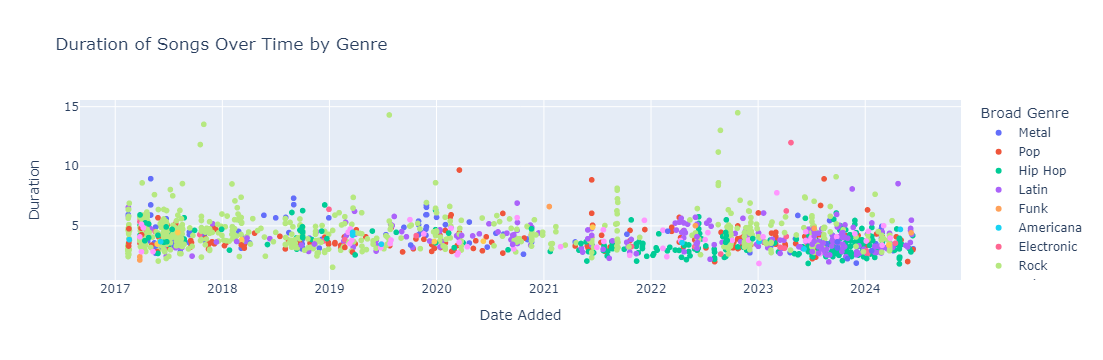

In [52]:
top_genres = ['Alternative', 'Dance', 'Electronic', 'Hip Hop', 'Indie', 'Latin', 'Metal', 'Other', 'Pop', 'Rock']
df_top_genres = df[df['Broad Genre'].isin(top_genres)]
fig = px.scatter(df, y='Duration', x='Date Added', color='Broad Genre', hover_data={'Track Name': True}, title='Duration of Songs Over Time by Genre')
fig.show()

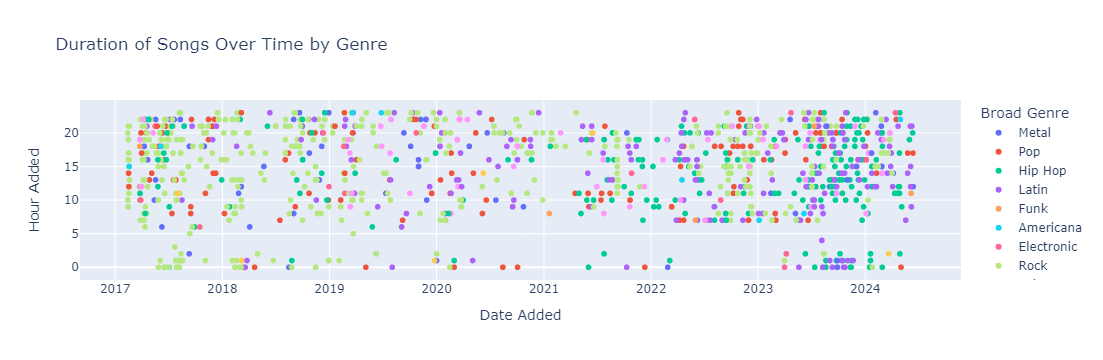

In [57]:
top_genres = ['Alternative', 'Dance', 'Electronic', 'Hip Hop', 'Indie', 'Latin', 'Metal', 'Other', 'Pop', 'Rock']
df_top_genres = df[df['Broad Genre'].isin(top_genres)]
fig = px.scatter(df, y='Hour Added', x='Date Added', color='Broad Genre', hover_data={'Track Name': True}, title='Duration of Songs Over Time by Genre')
fig.show()